## 导入前提包和模块

In [7]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

## 1生成数据集

In [8]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale = 1, shape = (num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale = 0.01, shape = labels.shape)
features[0], labels[0]

(
 [ 1.4642214 -1.3058136]
 <NDArray 2 @cpu(0)>, 
 [11.562276]
 <NDArray 1 @cpu(0)>)

### 第二个特征和标签的散点图

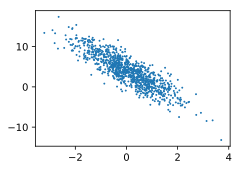

In [9]:
def use_svg_display():
    
    # 用矢量图显示
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize = (3.5, 2.5)):
    use_svg_display()
    
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

# 2.读取数据

In [10]:
'''
遍历数据集并不断读取小批量数据样本
'''

# 本函数已保存在gluonbook包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [11]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-1.6410413   0.5849184 ]
 [ 1.7129154  -0.7989493 ]
 [-1.3336163  -0.32597455]
 [ 1.6232128   0.8605224 ]
 [-0.3375157  -0.30513936]
 [ 1.0196427   0.58155286]
 [ 1.410807    0.5603151 ]
 [ 0.1316699   0.5989745 ]
 [ 0.22760487  0.38500294]
 [ 1.277694    0.00958286]]
<NDArray 10x2 @cpu(0)> 
[-1.0629104 10.333219   2.6604092  4.5051937  4.5675626  4.2686377
  5.130787   2.430585   3.3357205  6.735161 ]
<NDArray 10 @cpu(0)>


## 3.初始化模型参数

In [12]:
w = nd.random.normal(scale = 0.01, shape = (num_inputs, 1))
b = nd.zeros(shape = (1, ))
w.attach_grad()
b.attach_grad()

## 4.定义模型

In [13]:
def linreg(X, w, b): # 本函数已保存在gluonbook包中
    return nd.dot(X, w) + b

## 5.定义损失函数

In [14]:
def squared_loss(y_hat, y): # 本函数已保存在gluonbook包中
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 6.定义优化算法

In [15]:
def sgd(params, lr, batch_size): # 本函数已保存在gluonbook包中
    for param in params:
        param[:] = param - lr * param.grad / batch_size

## 7.训练模型

In [17]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs): # 训练模型一共需要num_epochs个迭代周期
    # 在一个迭代周期中，使用训练数据集中所有样本一次（假设样本数量能够被批量大小整除）
    # X和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y) # l是有关小批量X和y的损失
        l.backward() # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size) # 使⽤⼩批量随机梯度下降迭代模型参数
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.054456
epoch 2, loss 0.000249
epoch 3, loss 0.000050


In [18]:
true_w, w

([2, -3.4], 
 [[ 1.9998343]
  [-3.3992732]]
 <NDArray 2x1 @cpu(0)>)

In [19]:
true_b, b

(4.2, 
 [4.1988816]
 <NDArray 1 @cpu(0)>)